Linear regression

*   Import Numpy module for mathematicsl calulations
*   Import Pandas for Data Pre-processing
*   Import Matplotlib for Data Visualisation





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [ ]:
dataset = pd.read_csv('Medical.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Extract the relevant columns from the dataset
X = dataset[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = dataset['charges']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Convert the data to numpy arrays
X = X_encoded.values
y = y.values

# Normalize the feature values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


Split the dataset for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000):     #constructor with default parameters
        self.learning_rate = learning_rate   #initialsie the learning rate
        self.num_iterations = num_iterations #initialise the number of iterations

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)  # Initialize weights with zeros
        self.cost_history = []         #intialise the cost _history

        for i in range(self.num_iterations):
            y_pred = self.predict(X)
            error = y_pred - y          #calculate error

            # Calculate gradients
            gradients = np.dot(X.T, error) / len(X)

            # Update weights
            self.weights[1:] -= self.learning_rate * gradients
            self.weights[0] -= self.learning_rate * np.mean(error)

            # Calculate and store the cost
            cost = np.mean((error ** 2) / 2)
            self.cost_history.append(cost)

    def predict(self, X):         #predict for each value of test data
        return np.dot(X, self.weights[1:]) + self.weights[0]


In [ ]:
model = LinearRegression(learning_rate=0.0001, num_iterations=1000000) #creating an object for Linearregression class
model.fit(X_train, y_train)     #fit the model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:",math.sqrt(mse))


Mean Squared Error: 5681.183886386213


Scatter plot of actual vs. predicted values:

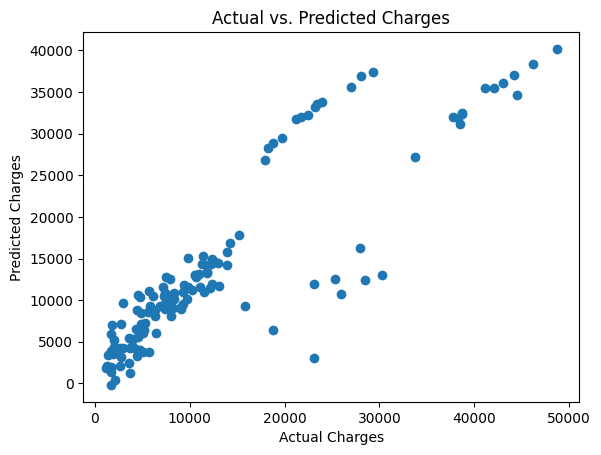

In [ ]:
plt.scatter(y_test, y_pred)         #plot scatter
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()

Cost history plot:

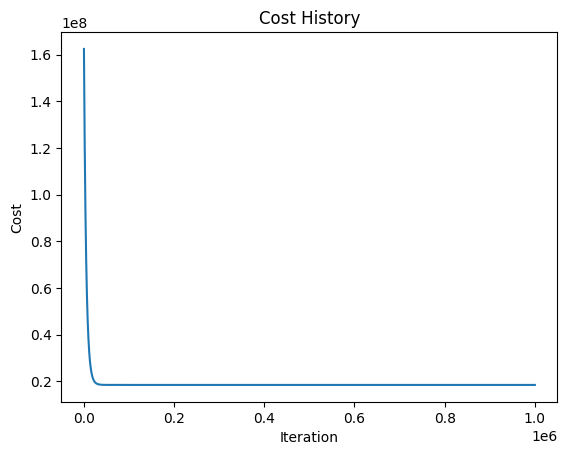

In [ ]:
plt.plot(range(1, len(model.cost_history) + 1), model.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

Residual plot:

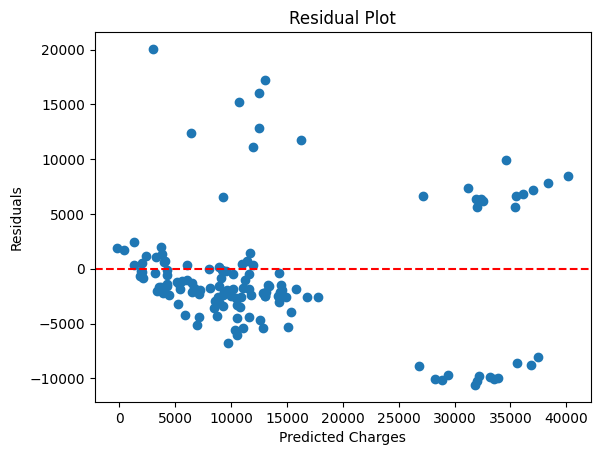

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()
